In [187]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [188]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Notes
- Understand domain, each column
- Column Vs Missing values
- There could be multiple applications from the same customer
- Amounts -> Can they be rounded off?
- Goods Vs Amount loan
- Do all clients with current application have entries in previous application?
- Is lesser amount given than that is asked for?AMT_APPLICATION	AMT_CREDIT	
- Is more amount asked for than that is needed? AMT_APPLICATION	AMT_GOODS_PRICE
- 1 curr_id has multiple prev_ids. Add number of prev_ids associated with this curr_id
- Replace all FLAG_DOCUMENT with a single FLAG_DOCUMENT with the sum
- For each Client, number of previous applications & how many were completed.
- Correlation matrix
- No information on whether the applicant has paid off the previous loans


- Columns have empty values
- AMT_DOWN_PAYMENT & RATE_DOWN_PAYMENT occur together
- Merge 2 datasets
- How to show/hide output - o

1. Data Cleaning: 
    - Remove the irrelevant columns. 
    - Remove/impute the missing values
2. Outlier handling:
    - Univariate: ordered or unordered, or it may be a numerical variable.
        - Categorical unordered:
        - Categorical ordered
        - Numerical variable: mean, median, mode, quantiles, and box plots, 
            - continuous
            - discrete 
        - Convert numerical variables into categorical ones
    - Multivariate  
        -  Bivariate: 
            - correlation and scatter plots on numerical variables
            - numerical and categorical variables: Boxplot
            - two categorical variables: bar graph
        -  Multivariate: heat maps 
3. Standardising values
Fixing invalid values
Filter data


### Table of Contents <a class="anchor" id="toc"></a>

* [Definitions](#definitions)
    * [Section 1.1](#section_1_1)
    * [Section 1.2](sSection_1_2)
        * [Section 1.2.1](#section_1_2_1)
        * [Section 1.2.2](#section_1_2_2)
        * [Section 1.2.3](#section_1_2_3)
* [Chapter 2](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)


## Definitions <a class="anchor" id="definitions"></a> [TOC](#toc)

In [189]:
def getCategoricalValues(df):
    cat_columns = df.select_dtypes(include=['object']).columns.tolist()
    cat_columns.sort()
    print(f"Columns with categorical values {len(cat_columns)} --> {cat_columns}")
    for col in cat_columns:
        count_values = df[col].unique().shape[0]
        print(f"{col:27} : [{count_values:2}] --> {sorted((df[col].unique().tolist())) if np.NaN not in df[col].unique().tolist() else (df[col].unique().tolist())}") 

In [190]:
def getNumCategoricalValues(df, ncat_columns):
    ncat_columns.sort()
    print(f"Columns with categorical values {len(ncat_columns)}")
    for col in ncat_columns:
        count_values = df[col].unique().shape[0]
        if count_values > 30:
            print(f"{col:26} : [{count_values:4}] --> {sorted(df[col].unique().tolist()[:10])}...{sorted(df[col].unique().tolist()[-10:])}") 
        else:
            print(f"{col:26} : [{count_values:4}] --> {sorted(df[col].unique().tolist())}") 

In [191]:
def plotBar(df, title, w=10, h=10):
    plt.figure(figsize=(w, h), dpi=80)
    ax = df.plot.bar() 
    # Annotate
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    ax.set_title(title)
    plt.show()

## Data Exploration 

### Data Reading & Data Types 

In [192]:
#Read the data in pandas
df_pa = pd.read_csv("data/previous_application.csv")

In [193]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [194]:
PA_COLUMNS = df_pa.columns.tolist()
PA_ID_COLUMNS = ['SK_ID_PREV','SK_ID_CURR']
PA_NCAT_COLUMNS = ['NFLAG_INSURED_ON_APPROVAL', 'NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA', 'HOUR_APPR_PROCESS_START']
print(len(max(PA_COLUMNS)))
getNumCategoricalValues(df_pa, PA_NCAT_COLUMNS)

26
Columns with categorical values 4
HOUR_APPR_PROCESS_START    : [  24] --> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
NFLAG_INSURED_ON_APPROVAL  : [   3] --> [0.0, 1.0, nan]
NFLAG_LAST_APPL_IN_DAY     : [   2] --> [0, 1]
SELLERPLACE_AREA           : [2097] --> [-1, 6, 20, 35, 50, 61, 83, 130, 136, 200]...[887, 1164, 1419, 1948, 2054, 2164, 2233, 2420, 3420, 6989]


In [195]:
getCategoricalValues(df_pa)

Columns with categorical values 16 --> ['CHANNEL_TYPE', 'CODE_REJECT_REASON', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PAYMENT_TYPE', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_TYPE_SUITE', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'WEEKDAY_APPR_PROCESS_START']
CHANNEL_TYPE                : [ 8] --> ['AP+ (Cash loan)', 'Car dealer', 'Channel of corporate sales', 'Contact center', 'Country-wide', 'Credit and cash offices', 'Regional / Local', 'Stone']
CODE_REJECT_REASON          : [ 9] --> ['CLIENT', 'HC', 'LIMIT', 'SCO', 'SCOFR', 'SYSTEM', 'VERIF', 'XAP', 'XNA']
FLAG_LAST_APPL_PER_CONTRACT : [ 2] --> ['N', 'Y']
NAME_CASH_LOAN_PURPOSE      : [25] --> ['Building a house or an annex', 'Business development', 'Buying a garage', 'Buying a holiday home / land', 'Buying a home', 'Buying a new car', 'Buying a used car', 'Car repairs', 'Education', 'Everyday 

In [196]:
df_pa[df_pa.columns.difference(PA_ID_COLUMNS + PA_NCAT_COLUMNS)].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,CNT_PAYMENT,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_TERMINATION,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED
count,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.297984e+06,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,774370.000000,5951.000000,5951.000000
mean,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.605408e+01,-8.806797e+02,342209.855039,13826.269337,76582.403064,33767.774054,81992.343838,0.079637,0.188357,0.773503
std,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,1.456729e+01,7.790997e+02,88916.115833,72444.869708,149647.415123,106857.034789,153303.516729,0.107823,0.087671,0.100879
min,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,-2.922000e+03,-2922.000000,-2892.000000,-2889.000000,-2801.000000,-2874.000000,-0.000015,0.034781,0.373150
25%,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,6.000000e+00,-1.300000e+03,365243.000000,-1628.000000,-1314.000000,-1242.000000,-1270.000000,0.000000,0.160716,0.715645
50%,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,-5.810000e+02,365243.000000,-831.000000,-537.000000,-361.000000,-499.000000,0.051605,0.189122,0.835095
75%,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,2.400000e+01,-2.800000e+02,365243.000000,-411.000000,-74.000000,129.000000,-44.000000,0.108909,0.193330,0.852537
max,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,8.400000e+01,-1.000000e+00,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,1.000000,1.000000


In [197]:
df_pa.loc[df_pa['NAME_PRODUCT_TYPE']!='x-sell'][['NAME_PRODUCT_TYPE','NAME_SELLER_INDUSTRY']]

,NAME_PRODUCT_TYPE,NAME_SELLER_INDUSTRY
0,XNA,Connectivity
4,walk-in,XNA
6,XNA,XNA
7,XNA,XNA
8,XNA,XNA
...,...,...
1670206,walk-in,XNA
1670207,walk-in,XNA
1670209,XNA,Furniture
1670210,XNA,Furniture


In [198]:
df_pa[['NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE','RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']]

,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,POS,XNA,0.000000,0.182832,0.867336,middle,POS mobile with interest
1,Cash,x-sell,NaN,NaN,NaN,low_action,Cash X-Sell: low
2,Cash,x-sell,NaN,NaN,NaN,high,Cash X-Sell: high
3,Cash,x-sell,NaN,NaN,NaN,middle,Cash X-Sell: middle
4,Cash,walk-in,NaN,NaN,NaN,high,Cash Street: high
...,...,...,...,...,...,...,...
1670209,POS,XNA,0.000000,NaN,NaN,low_normal,POS industry with interest
1670210,POS,XNA,0.340554,NaN,NaN,middle,POS industry with interest
1670211,POS,XNA,0.101401,NaN,NaN,low_normal,POS household with interest
1670212,Cash,x-sell,NaN,NaN,NaN,low_normal,Cash X-Sell: low


Check if there are multiple entries for each client in the previous application.

In [199]:
def groupByAndCount(df, col, skipPercent=True):
    total_rows = df.shape[0]
    df_ = df.groupby(by=col).agg({col:"count"})
    df_.rename(columns={col:'Count'}, inplace=True)
    df_.reset_index(inplace=True)
    df_.sort_values(by='Count', ascending=False, inplace=True)
    if not skipPercent:
        df_['%'] = round((df_['Count']/total_rows)*100,2)
    return df_


In [200]:
groupByAndCount(df_pa, 'SK_ID_PREV')

,SK_ID_PREV,Count
0,1000001,1
1113473,2230564,1
1113483,2230574,1
1113482,2230573,1
1113481,2230572,1
...,...,...
556734,1615728,1
556733,1615727,1
556732,1615726,1
556731,1615725,1


In [201]:
groupByAndCount(df_pa, 'SK_ID_CURR')


,SK_ID_CURR,Count
83581,187868,77
157523,265681,73
70132,173680,72
135448,242412,68
101569,206783,67
...,...,...
200467,310872,1
85950,190357,1
85951,190358,1
33175,134814,1


There is only one entry per client

Do all clients in current application have an entry in the previous application?

In [202]:
groupByAndCount(df_pa, 'NAME_CONTRACT_STATUS', skipPercent=False)

,NAME_CONTRACT_STATUS,Count,%
0,Approved,1036781,62.07
1,Canceled,316319,18.94
2,Refused,290678,17.40
3,Unused offer,26436,1.58


In [203]:
groupByAndCount(df_pa, 'NAME_CONTRACT_TYPE', skipPercent=False)

,NAME_CONTRACT_TYPE,Count,%
0,Cash loans,747553,44.76
1,Consumer loans,729151,43.66
2,Revolving loans,193164,11.57
3,XNA,346,0.02


In [204]:
groupByAndCount(df_pa, 'NAME_CLIENT_TYPE', skipPercent=False)

,NAME_CLIENT_TYPE,Count,%
2,Repeater,1231261,73.72
0,New,301363,18.04
1,Refreshed,135649,8.12
3,XNA,1941,0.12


In [205]:
df_pa['NAME_CLIENT_TYPE'].value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [206]:
groupByAndCount(df_pa, 'NAME_PORTFOLIO', skipPercent=False)

,NAME_PORTFOLIO,Count,%
3,POS,691011,41.37
2,Cash,461563,27.63
4,XNA,372230,22.29
0,Cards,144985,8.68
1,Cars,425,0.03


In [207]:
groupByAndCount(df_pa, 'NAME_GOODS_CATEGORY', skipPercent=False)

,NAME_GOODS_CATEGORY,Count,%
27,XNA,950809,56.93
19,Mobile,224708,13.45
7,Consumer Electronics,121576,7.28
5,Computers,105769,6.33
2,Audio/Video,99441,5.95
11,Furniture,53656,3.21
22,Photo / Cinema Equipment,25021,1.50
6,Construction Materials,24995,1.50
4,Clothing and Accessories,23554,1.41
3,Auto Accessories,7381,0.44


In [208]:
groupByAndCount(df_pa, 'NAME_PRODUCT_TYPE', skipPercent=False)

,NAME_PRODUCT_TYPE,Count,%
0,XNA,1063666,63.68
2,x-sell,456287,27.32
1,walk-in,150261,9.00


In [209]:
groupByAndCount(df_pa, 'CHANNEL_TYPE', skipPercent=False)

,CHANNEL_TYPE,Count,%
5,Credit and cash offices,719968,43.11
4,Country-wide,494690,29.62
7,Stone,212083,12.70
6,Regional / Local,108528,6.50
3,Contact center,71297,4.27
0,AP+ (Cash loan),57046,3.42
2,Channel of corporate sales,6150,0.37
1,Car dealer,452,0.03


In [210]:
groupByAndCount(df_pa, 'PRODUCT_COMBINATION', skipPercent=False)

,PRODUCT_COMBINATION,Count,%
2,Cash,285990,17.12
9,POS household with interest,263622,15.78
13,POS mobile with interest,220670,13.21
8,Cash X-Sell: middle,143883,8.61
7,Cash X-Sell: low,130248,7.80
0,Card Street,112582,6.74
11,POS industry with interest,98833,5.92
10,POS household without interest,82908,4.96
1,Card X-Sell,80582,4.82
3,Cash Street: high,59639,3.57


In [211]:
df_pa['RATE_DOWN_PAYMENT'].isna().sum() 

895844

In [212]:
df_pa['interest'] = np.NaN
df_pa['interest'].isna().sum() 

1670214

In [213]:
df_pa['interest'] = df_pa.apply(lambda x: x['RATE_DOWN_PAYMENT'] + x['RATE_INTEREST_PRIMARY'] + x['RATE_INTEREST_PRIVILEGED'], axis=1)

In [214]:
df_pa['interest'] 

0          1.050168
1               NaN
2               NaN
3               NaN
4               NaN
             ...   
1670209         NaN
1670210         NaN
1670211         NaN
1670212         NaN
1670213         NaN
Name: interest, Length: 1670214, dtype: float64

In [215]:

PRODUCT_COMBINATION_COLUMNS = ['interest', 'NAME_PORTFOLIO', 'NAME_GOODS_CATEGORY', 'NAME_PRODUCT_TYPE',   'NAME_YIELD_GROUP', 	'PRODUCT_COMBINATION']

In [216]:
df_pa[PRODUCT_COMBINATION_COLUMNS]

,interest,NAME_PORTFOLIO,NAME_GOODS_CATEGORY,NAME_PRODUCT_TYPE,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,1.050168,POS,Mobile,XNA,middle,POS mobile with interest
1,NaN,Cash,XNA,x-sell,low_action,Cash X-Sell: low
2,NaN,Cash,XNA,x-sell,high,Cash X-Sell: high
3,NaN,Cash,XNA,x-sell,middle,Cash X-Sell: middle
4,NaN,Cash,XNA,walk-in,high,Cash Street: high
...,...,...,...,...,...,...
1670209,NaN,POS,Furniture,XNA,low_normal,POS industry with interest
1670210,NaN,POS,Furniture,XNA,middle,POS industry with interest
1670211,NaN,POS,Consumer Electronics,XNA,low_normal,POS household with interest
1670212,NaN,Cash,XNA,x-sell,low_normal,Cash X-Sell: low


In [217]:
# TODO: Change this to .csv
df_columns = pd.read_excel("data/columns_description.xlsx")
df_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   160 non-null    int64  
 1   Table        160 non-null    object 
 2   Category     154 non-null    object 
 3   Values       45 non-null     object 
 4   Common       8 non-null      float64
 5   Type         70 non-null     object 
 6   Remarkds     41 non-null     object 
 7   Row          160 non-null    object 
 8   Description  160 non-null    object 
 9   Special      69 non-null     object 
 10  Unnamed: 10  3 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 13.9+ KB


In [218]:
PA_CONTRACT_COLUMNS = df_columns[(df_columns['Table']=='previous_application.csv') & (df_columns['Category']=='CONTRACT')]['Row'].tolist()
PA_CONTRACT_COLUMNS

['NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE']

In [219]:
df_pa_contract = df_pa[['SK_ID_PREV']  + PA_CONTRACT_COLUMNS]

In [220]:
df_pa_contract['AMT_APP_CRED_DIFF'] = df_pa_contract['AMT_APPLICATION'] - df_pa_contract['AMT_CREDIT']
df_pa_contract['AMT_APP_GOOD_DIFF'] = df_pa['AMT_APPLICATION'] - df_pa['AMT_GOODS_PRICE']

In [221]:
df_pa_contract['AMT_APP_CRED_DIFF'] 

0              0.0
1         -72171.0
2         -23944.5
3         -20790.0
4         -66555.0
            ...   
1670209   -44104.5
1670210    23458.5
1670211     2713.5
1670212   -11880.0
1670213        0.0
Name: AMT_APP_CRED_DIFF, Length: 1670214, dtype: float64

In [222]:
# Is the application amount > the goods price? Is the credit amount < application amount? 
df_pa_contract_ = df_pa_contract[(df_pa_contract['AMT_APP_GOOD_DIFF'] > 0) | (df_pa_contract['AMT_APP_CRED_DIFF'] > 0)] [['SK_ID_PREV', 'NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS', 'AMT_APP_CRED_DIFF', 'AMT_APP_GOOD_DIFF']]

In [223]:
df_pa_contract_.to_csv("out/temp.csv")

In [224]:
# Looks like AMT_DOWN_PAYMENT & RATE_DOWN_PAYMENT occur together. Check if there is AMT_DOWN_PAYMENT if there is no RATE_DOWN_PAYMENT? 
df_pa[ ((df_pa['RATE_DOWN_PAYMENT'] == 0) | (df_pa['RATE_DOWN_PAYMENT'].isna() == True)) & (df_pa['AMT_DOWN_PAYMENT'] > 0) ][['SK_ID_PREV', 'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT']] #

,SK_ID_PREV,RATE_DOWN_PAYMENT,AMT_DOWN_PAYMENT


In [225]:
df_pa.loc[df_pa['NAME_CONTRACT_STATUS'] == 'Refused'].to_csv("out/refused.csv")

In [226]:
df_pa_curr_ids = groupByAndCount(df_pa, 'SK_ID_CURR')

In [227]:
df_pa_curr_ids

,SK_ID_CURR,Count
83581,187868,77
157523,265681,73
70132,173680,72
135448,242412,68
101569,206783,67
...,...,...
200467,310872,1
85950,190357,1
85951,190358,1
33175,134814,1


In [228]:
df_pa_curr_ids[df_pa_curr_ids['Count'] == 1].shape[0]

60458

In [229]:
df_pa_curr_ids[df_pa_curr_ids['Count'] > 1].to_csv("out/multiple_curr_id.csv")

In [230]:
curr_ids_multiple_prev_app = df_pa_curr_ids[df_pa_curr_ids['Count'] > 1]['SK_ID_CURR'].tolist()

In [231]:
curr_ids_multiple_prev_app[0:4]

[187868, 265681, 173680, 242412]

In [232]:
df_ca = pd.read_csv("data/application_data.csv")

In [318]:
df_ca.shape[0]

307511

In [233]:
df_ca[(df_ca['SK_ID_CURR'].isin(curr_ids_multiple_prev_app))]['TARGET'].value_counts()

0    219079
1     19445
Name: TARGET, dtype: int64

In [234]:
round(100. * df_ca['TARGET'].value_counts()/ len(df_ca['TARGET']),2)

0    91.93
1     8.07
Name: TARGET, dtype: float64

In [235]:
df_ca[df_ca['TARGET'] == 1].to_csv("out/defaulter_curr_ids.csv")

## Gender

In [236]:
df_ca['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

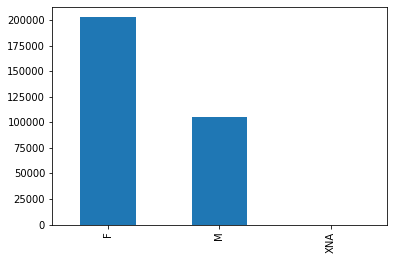

In [237]:
df_ca['CODE_GENDER'].value_counts().plot.bar();plt.show()

In [238]:
df_ca_1 = df_ca[df_ca['TARGET']==1][['CODE_GENDER','TARGET']]; print(df_ca_1.shape[0])
df_ca_1 = groupByAndCount(df_ca_1, 'CODE_GENDER')
df_ca_1.rename(columns={'Count':'Target=1'},inplace=True)
print(df_ca_1)

df_ca_0 = df_ca[df_ca['TARGET']==0][['CODE_GENDER','TARGET']]; print(df_ca_0.shape[0])
df_ca_0 = groupByAndCount(df_ca_0, 'CODE_GENDER')
df_ca_0.rename(columns={'Count':'Target=0'},inplace=True)
print(df_ca_0)


df_ca_gender = df_ca_0.merge(df_ca_1, how='left',on='CODE_GENDER')
df_ca_gender.set_index('CODE_GENDER', inplace=True)
df_ca_gender

24825
  CODE_GENDER  Target=1
0           F     14170
1           M     10655
282686
  CODE_GENDER  Target=0
0           F    188278
1           M     94404
2         XNA         4


,Target=0,Target=1
CODE_GENDER,,
F,188278,14170.0
M,94404,10655.0
XNA,4,NaN


<Figure size 800x800 with 0 Axes>

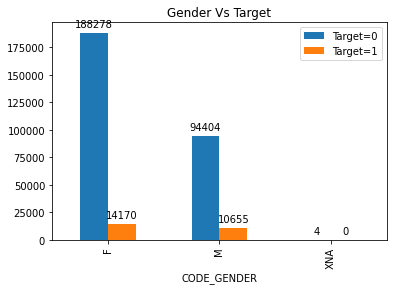

In [239]:
plotBar(df_ca_gender, "Gender Vs Target")

More percentage of females have difficulties in paying off

## Assets

In [240]:
def makeDFForTarget(df, col, taretVal):
    df_ = df[df['TARGET']==taretVal][[col,'TARGET']]
    cnt = df_.shape[0]
    df_ = groupByAndCount(df_, col)
    df_.rename(columns={'Count':f'Target={taretVal}'},inplace=True)
    #print(df_)
    return df_, cnt


def makeDFForTargets(df, col):
    df_1, cnt_1 = makeDFForTarget(df, col, 1)
    df_0, cnt_0 = makeDFForTarget(df, col, 0)
    print(cnt_1, cnt_0)

    df_ = df_0.merge(df_1, how='left',on=col)
    print(df_)
    df_.set_index(col, inplace=True)
    return df_

24825 282686
  FLAG_OWN_CAR  Target=0  Target=1
0            N    185675     17249
1            Y     97011      7576


<Figure size 800x800 with 0 Axes>

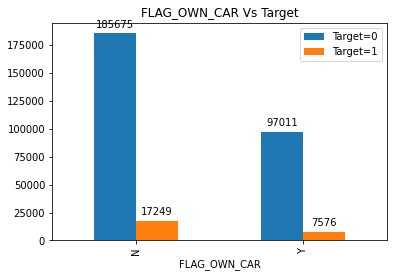

24825 282686
  FLAG_OWN_REALTY  Target=0  Target=1
0               Y    196329     16983
1               N     86357      7842


<Figure size 800x800 with 0 Axes>

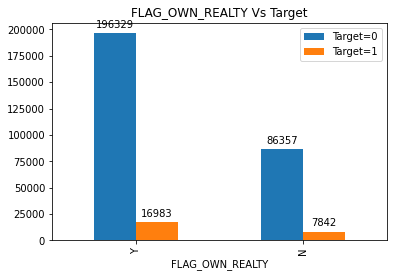

24825 282686
       NAME_INCOME_TYPE  Target=0  Target=1
0               Working    143550   15224.0
1  Commercial associate     66257    5360.0
2             Pensioner     52380    2982.0
3         State servant     20454    1249.0
4               Student        18       NaN
5            Unemployed        14       8.0
6           Businessman        10       NaN
7       Maternity leave         3       2.0


<Figure size 800x800 with 0 Axes>

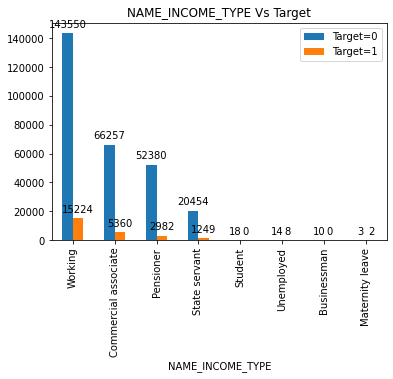

24825 282686
             NAME_EDUCATION_TYPE  Target=0  Target=1
0  Secondary / secondary special    198867     19524
1               Higher education     70854      4009
2              Incomplete higher      9405       872
3                Lower secondary      3399       417
4                Academic degree       161         3


<Figure size 800x800 with 0 Axes>

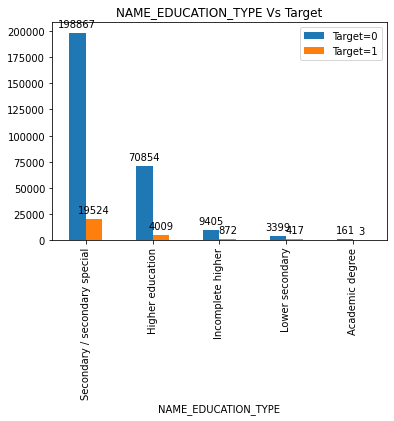

24825 282686
     NAME_HOUSING_TYPE  Target=0  Target=1
0    House / apartment    251596     21272
1         With parents     13104      1736
2  Municipal apartment     10228       955
3     Rented apartment      4280       601
4     Office apartment      2445       172
5      Co-op apartment      1033        89


<Figure size 800x800 with 0 Axes>

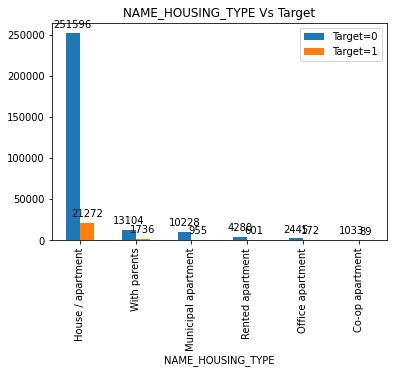

24825 282686
          OCCUPATION_TYPE  Target=0  Target=1
0                Laborers     49348      5838
1             Sales staff     29010      3092
2              Core staff     25832      1738
3                Managers     20043      1328
4                 Drivers     16496      2107
5   High skill tech staff     10679       701
6             Accountants      9339       474
7          Medicine staff      7965       572
8          Security staff      5999       722
9           Cooking staff      5325       621
10         Cleaning staff      4206       447
11  Private service staff      2477       175
12     Low-skill Laborers      1734       359
13            Secretaries      1213        92
14   Waiters/barmen staff      1196       152
15          Realty agents       692        59
16               HR staff       527        36
17               IT staff       492        34


<Figure size 800x800 with 0 Axes>

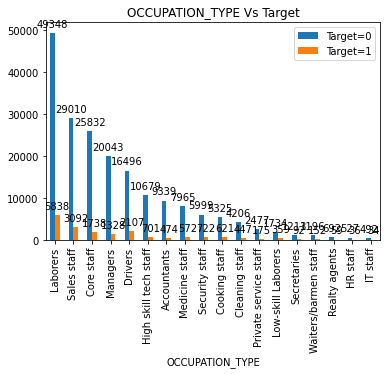

24825 282686
         ORGANIZATION_TYPE  Target=0  Target=1
0   Business Entity Type 3     61669      6323
1                      XNA     52384      2990
2            Self-employed     34504      3908
3                    Other     15408      1275
4                 Medicine     10456       737
5               Government      9678       726
6   Business Entity Type 2      9653       900
7                   School      8367       526
8            Trade: type 7      7091       740
9             Kindergarten      6396       484
10            Construction      5936       785
11  Business Entity Type 1      5497       487
12       Transport: type 4      4897       501
13        Industry: type 9      3143       225
14           Trade: type 3      3131       361
15        Industry: type 3      2930       348
16                Security      2923       324
17                 Housing      2723       235
18                Military      2499       135
19       Industry: type 11      2470       234


<Figure size 800x800 with 0 Axes>

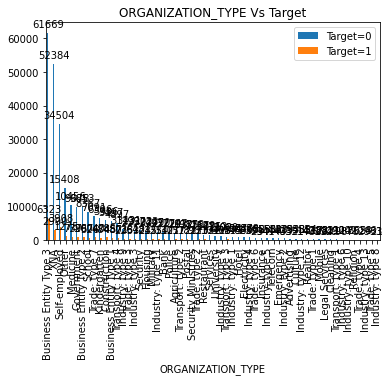

In [241]:
for col in ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']:
    df_= makeDFForTargets(df_ca, col)
    plotBar(df_, f"{col} Vs Target")

In [242]:
df_ca['AMT_INCOME_TOTAL']

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

<AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}, xlabel='TARGET'>

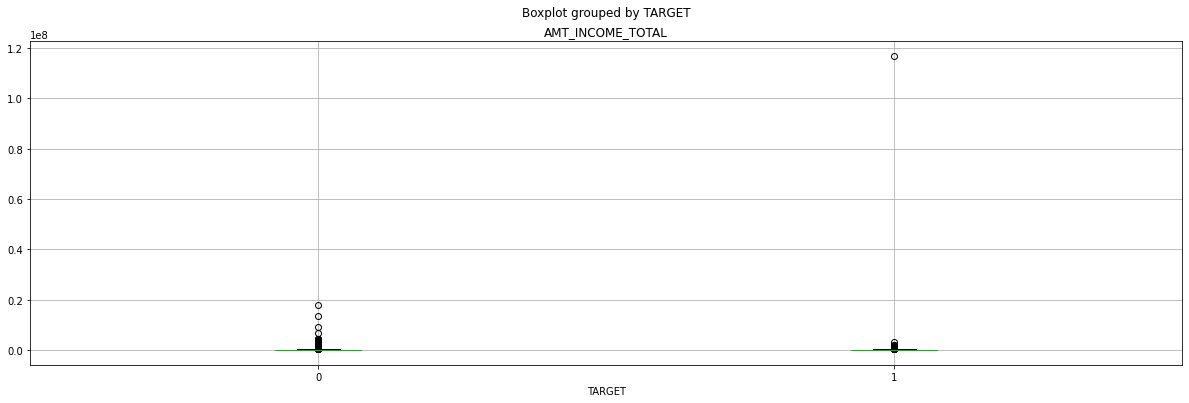

In [243]:
df_ca.boxplot(column='AMT_INCOME_TOTAL', by='TARGET', figsize = (20, 6))

In [244]:
df_ca.quantile([0.9, 0.95, .9999])['AMT_INCOME_TOTAL']

0.9000     270000.0
0.9500     337500.0
0.9999    2250000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [245]:
CA_CLIENT_COLUMNS = df_columns[(df_columns['Table']=='application_data') & (df_columns['Category']=='CLIENT')]['Row'].tolist()
CA_APPLICATION_COLUMNS = df_columns[(df_columns['Table']=='application_data') & (df_columns['Category']=='APPLICATION')]['Row'].tolist()
CA_BUILDING_COLUMNS = df_columns[(df_columns['Table']=='application_data') & (df_columns['Category']=='BUILDING')]['Row'].tolist()
CA_CLIENT_COLUMNS

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'ORGANIZATION_TYPE',
 'DAYS_LAST_PHONE_CHANGE']

In [246]:
df_ca_maxincome = df_ca.iloc[df_ca['AMT_INCOME_TOTAL'].idxmax()][['SK_ID_CURR','AMT_INCOME_TOTAL'] + CA_CLIENT_COLUMNS ]
df_ca_maxincome[CA_CLIENT_COLUMNS]

CODE_GENDER                                                F
FLAG_OWN_CAR                                               N
FLAG_OWN_REALTY                                            Y
CNT_CHILDREN                                               1
AMT_INCOME_TOTAL                                 117000000.0
AMT_INCOME_TOTAL                                 117000000.0
NAME_INCOME_TYPE                                     Working
NAME_EDUCATION_TYPE            Secondary / secondary special
NAME_FAMILY_STATUS                                   Married
NAME_HOUSING_TYPE                          House / apartment
REGION_POPULATION_RELATIVE                          0.010643
DAYS_BIRTH                                            -12615
DAYS_EMPLOYED                                           -922
OWN_CAR_AGE                                              NaN
OCCUPATION_TYPE                                     Laborers
CNT_FAM_MEMBERS                                          3.0
REGION_RATING_CLIENT    

In [247]:
df_ca['AGE'] = (df_ca['DAYS_BIRTH']/365)*(-1)

<AxesSubplot:title={'center':'AGE'}, xlabel='TARGET'>

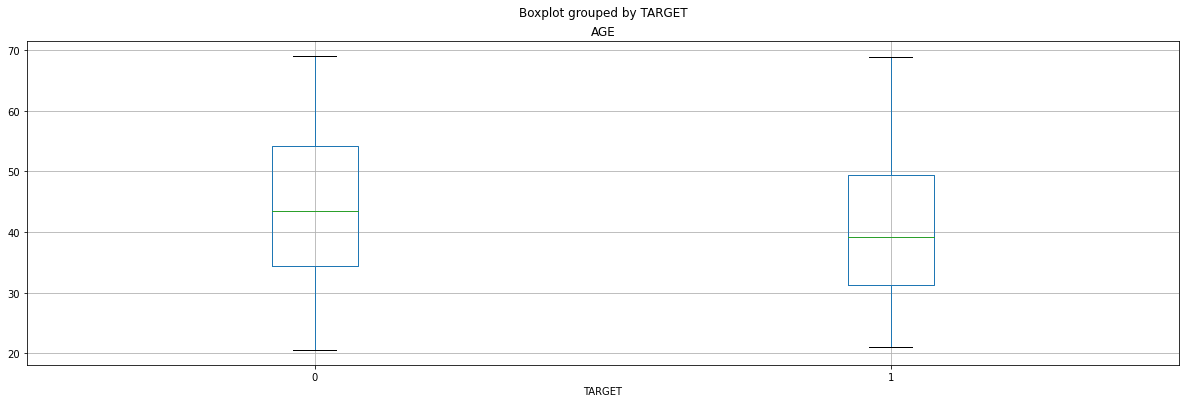

In [248]:
df_ca.boxplot(column='AGE', by='TARGET', figsize = (20, 6))

In [249]:
df_ca['OWN_CAR_AGE'].describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

In [250]:
df_ca[CA_CLIENT_COLUMNS + ['AGE']].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,AGE
count,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,104582.000000,307509.000000,307511.000000,307511.000000,307510.000000,307511.000000
mean,0.417052,1.687979e+05,0.020868,-16036.995067,63815.045904,12.061091,2.152665,2.052463,2.031521,-962.858788,43.936973
std,0.722121,2.371231e+05,0.013831,4363.988632,141275.766519,11.944812,0.910682,0.509034,0.502737,826.808487,11.956133
min,0.000000,2.565000e+04,0.000290,-25229.000000,-17912.000000,0.000000,1.000000,1.000000,1.000000,-4292.000000,20.517808
25%,0.000000,1.125000e+05,0.010006,-19682.000000,-2760.000000,5.000000,2.000000,2.000000,2.000000,-1570.000000,34.008219
50%,0.000000,1.471500e+05,0.018850,-15750.000000,-1213.000000,9.000000,2.000000,2.000000,2.000000,-757.000000,43.150685
75%,1.000000,2.025000e+05,0.028663,-12413.000000,-289.000000,15.000000,3.000000,2.000000,2.000000,-274.000000,53.923288
max,19.000000,1.170000e+08,0.072508,-7489.000000,365243.000000,91.000000,20.000000,3.000000,3.000000,0.000000,69.120548


In [251]:
print(df_ca.loc[df_ca['REGION_RATING_CLIENT'] != df_ca['REGION_RATING_CLIENT_W_CITY']][['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']].shape[0])
print(df_ca.loc[df_ca['REGION_RATING_CLIENT'] > df_ca['REGION_RATING_CLIENT_W_CITY']][['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']].shape[0])
print(df_ca.loc[df_ca['REGION_RATING_CLIENT'] < df_ca['REGION_RATING_CLIENT_W_CITY']][['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']].shape[0])

5718
5718
0


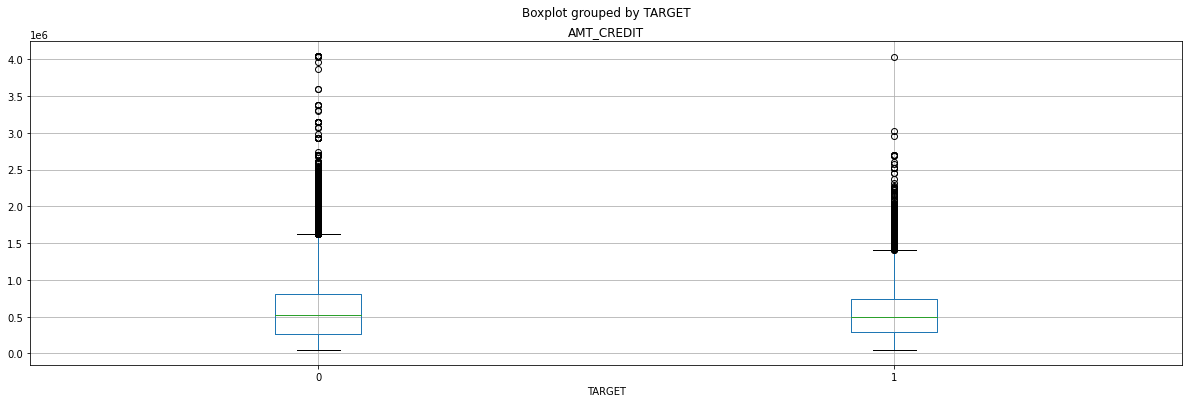

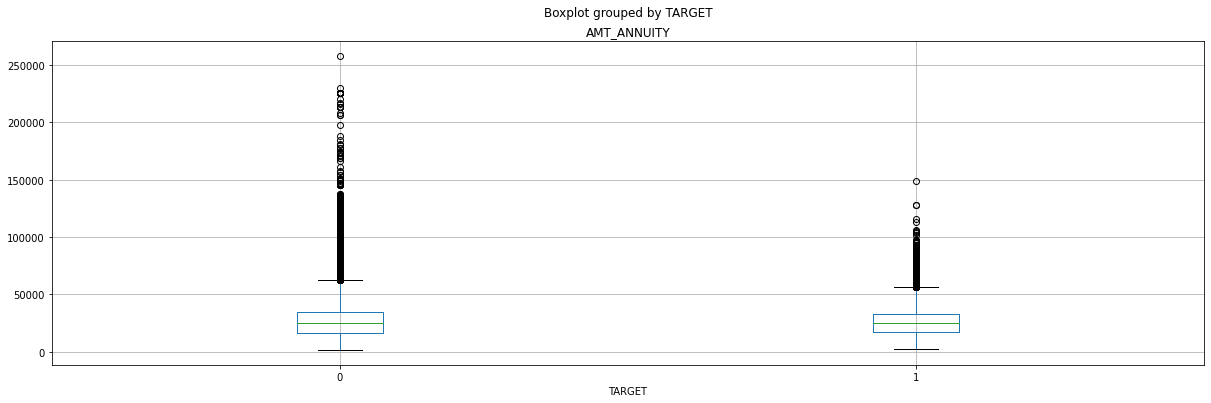

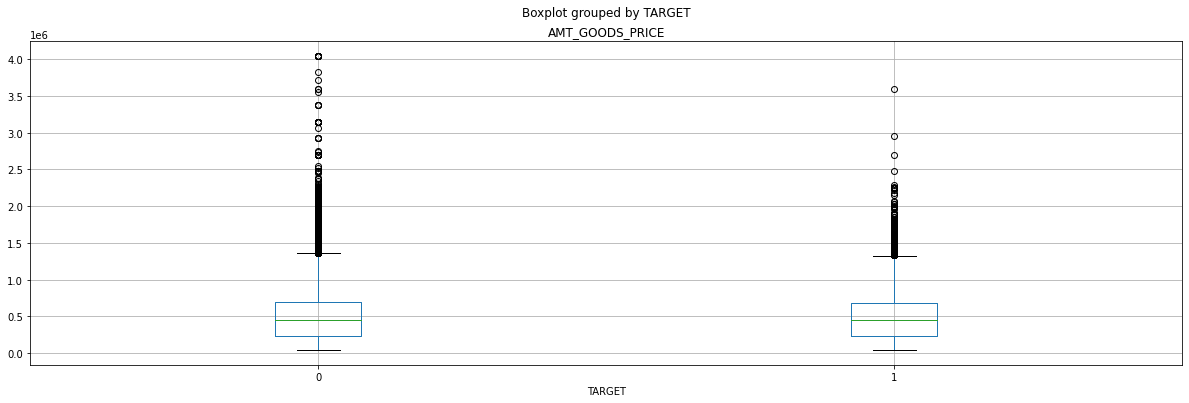

In [252]:
for col in ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']:
    df_ca.boxplot(column=col, by='TARGET', figsize = (20, 6))

In [253]:
df_ca[['SK_ID_CURR'] + CA_APPLICATION_COLUMNS]

,SK_ID_CURR,NAME_TYPE_SUITE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,Unaccompanied,-3648.0,-2120,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,100003,Family,-1186.0,-291,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,100004,Unaccompanied,-4260.0,-2531,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,100006,Unaccompanied,-9833.0,-2437,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100007,Unaccompanied,-4311.0,-3458,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,Unaccompanied,-8456.0,-1982,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
307507,456252,Unaccompanied,-4388.0,-4090,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
307508,456253,Unaccompanied,-6737.0,-5150,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
307509,456254,Unaccompanied,-2562.0,-931,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [254]:
CA_FLAG_DOCUMENT_COLUMNS = list(filter(lambda x: x[:14] == 'FLAG_DOCUMENT_', df_ca.columns.tolist()))
CA_FLAG_DOCUMENT_COLUMNS

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [255]:
import functools
#df_ca['FLAG_DOCUMENT'] = df_ca[CA_FLAG_DOCUMENT_COLUMNS].apply(lambda row: functools.reduce(lambda a, b: a+b, row))
df_ca['FLAG_DOCUMENT'] = functools.reduce(lambda a, b: a+b, [df_ca[col] for col in CA_FLAG_DOCUMENT_COLUMNS])
df_ca[['SK_ID_CURR', 'FLAG_DOCUMENT'] + CA_FLAG_DOCUMENT_COLUMNS]

,SK_ID_CURR,FLAG_DOCUMENT,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100003,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,100006,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100007,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
307507,456252,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307508,456253,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [256]:
df_ca['FLAG_DOCUMENT'].describe()

count    307511.000000
mean          0.930155
std           0.344295
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: FLAG_DOCUMENT, dtype: float64

In [257]:
#  df_ca.plot.bar('FLAG_DOCUMENT', figsize = (20, 6))
df_ca['FLAG_DOCUMENT'].value_counts()

1    270056
0     29549
2      7742
3       163
4         1
Name: FLAG_DOCUMENT, dtype: int64

In [258]:
df_ca[df_ca['FLAG_DOCUMENT']==4]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,FLAG_DOCUMENT
92114,206962,1,Cash loans,M,N,N,1,180000.0,1006920.0,38484.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,26.378082,4


In [259]:
df_ca[CA_BUILDING_COLUMNS]

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,...,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No
1,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,...,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,...,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No
307507,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,...,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No
307508,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,...,NaN,0.0855,0.9445,0.0000,0.0000,reg oper account,block of flats,0.7970,Panel,No
307509,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,...,NaN,NaN,0.0062,NaN,NaN,NaN,block of flats,0.0086,"Stone, brick",No


In [260]:
df_ca.iloc[df_ca['AMT_INCOME_TOTAL'].idxmax()][['SK_ID_CURR','AMT_INCOME_TOTAL']]

SK_ID_CURR               114967
AMT_INCOME_TOTAL    117000000.0
Name: 12840, dtype: object

In [261]:
df_ca_red = df_ca[df_ca['SK_ID_CURR'] != 114967]
print(df_ca.shape[0], df_ca_red.shape[0])

307511 307510


In [262]:
def plotScatter(df, col1, col2, title, pos=1, log=False):
    plt.subplot(1, 2, pos)
    ax = df.plot.scatter(col1, col2,figsize=(10, 6))
    if log == True: ax.set_xscale('log')
    ax.set_title(title)
    plt.show()

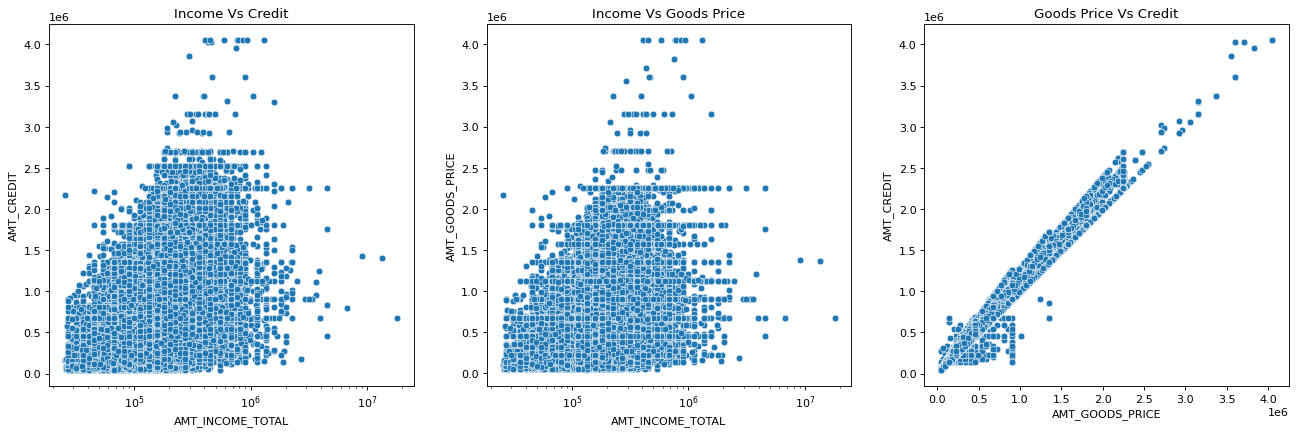

In [263]:
plt.figure(figsize=(20, 6), dpi=80)
plt.subplot(1, 3, 1)
ax = sns.scatterplot(df_ca_red['AMT_INCOME_TOTAL'], df_ca_red['AMT_CREDIT']); ax.set_xscale('log'); ax.set_title("Income Vs Credit")
plt.subplot(1, 3, 2)
ax = sns.scatterplot(df_ca_red['AMT_INCOME_TOTAL'], df_ca_red['AMT_GOODS_PRICE']); ax.set_xscale('log'); ax.set_title("Income Vs Goods Price")
plt.subplot(1, 3, 3)
ax = sns.scatterplot(df_ca_red['AMT_GOODS_PRICE'], df_ca_red['AMT_CREDIT']); ax.set_title("Goods Price Vs Credit")
plt.show()

# TODO: How to get the outliers? 

In [264]:
df_pa.groupby(by='SK_ID_CURR').agg({'SK_ID_PREV':'count'})

,SK_ID_PREV
SK_ID_CURR,
100001,1
100002,1
100003,3
100004,1
100005,2
...,...
456251,1
456252,1
456253,2


In [265]:
df_pa_ca_status = df_pa.pivot_table(index='SK_ID_CURR', values=['SK_ID_PREV'],columns=['NAME_CONTRACT_STATUS'], aggfunc=['count'],fill_value=0) 
df_pa_ca_status.columns = df_pa_ca_status.columns.droplevel()
df_pa_ca_status.columns = df_pa_ca_status.columns.droplevel()
df_pa_ca_status

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
SK_ID_CURR,,,,
100001,1,0,0,0
100002,1,0,0,0
100003,3,0,0,0
100004,1,0,0,0
100005,1,1,0,0
...,...,...,...,...
456251,1,0,0,0
456252,1,0,0,0
456253,2,0,0,0


In [302]:
df_pa_ca_counts = df_pa.pivot_table(index='SK_ID_CURR', values=['SK_ID_PREV'], aggfunc=['count'],fill_value=0) 
df_pa_ca_counts.columns = df_pa_ca_counts.columns.droplevel()
df_pa_ca_counts.rename(columns={'SK_ID_PREV':'Total Prev Apps'}, inplace=True)
df_pa_ca_counts

,Total Prev Apps
SK_ID_CURR,
100001,1
100002,1
100003,3
100004,1
100005,2
...,...
456251,1
456252,1
456253,2


In [303]:
df_pa_ca = df_pa_ca_counts.merge(df_pa_ca_status, how='inner', on='SK_ID_CURR')
df_pa_ca.reset_index(inplace=True)
df_pa_ca

,SK_ID_CURR,Total Prev Apps,Approved,Canceled,Refused,Unused offer
0,100001,1,1,0,0,0
1,100002,1,1,0,0,0
2,100003,3,3,0,0,0
3,100004,1,1,0,0,0
4,100005,2,1,1,0,0
...,...,...,...,...,...,...
338852,456251,1,1,0,0,0
338853,456252,1,1,0,0,0
338854,456253,2,2,0,0,0
338855,456254,2,2,0,0,0


In [307]:
df_pa_ca['Refused%'] = round((df_pa_ca['Refused']/df_pa_ca['Total Prev Apps'])*100,2)
df_pa_ca[df_pa_ca['Refused%'] > 50].sort_values(by='Refused%', ascending= False)

,SK_ID_CURR,Total Prev Apps,Approved,Canceled,Refused,Unused offer,Refused%
29068,130502,1,0,0,1,0,100.00
135740,242720,1,0,0,1,0,100.00
255157,368372,1,0,0,1,0,100.00
61090,164176,1,0,0,1,0,100.00
134228,241118,3,0,0,3,0,100.00
...,...,...,...,...,...,...,...
245423,358127,33,9,6,17,1,51.52
224843,336513,33,10,6,17,0,51.52
277876,391759,39,13,4,20,2,51.28
259201,372644,41,15,0,21,5,51.22


In [308]:
print(df_pa.shape[0], df_pa_ca['Total Prev Apps'].sum())

1670214 1670214


In [315]:
curr_ids_rej_pa = df_pa_ca[df_pa_ca['Refused%'] > 75 ]['SK_ID_CURR']
print(curr_ids_rej_pa.shape[0])
curr_ids_rej_pa = curr_ids_rej_pa.tolist()
curr_ids_rej_pa[0:4]

1988


[100030, 100099, 100505, 101076]

In [316]:
df_ca[df_ca['SK_ID_CURR'].isin(curr_ids_rej_pa)]#.groupby('TARGET').agg({'TARGET':'count'})

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,FLAG_DOCUMENT
25,100030,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.969863,1
84,100099,0,Cash loans,F,N,Y,0,360000.0,733315.5,41076.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,63.101370,1
438,100505,0,Cash loans,M,Y,Y,3,225000.0,675000.0,24799.5,...,0,0,0.0,0.0,0.0,0.0,0.0,4.0,47.183562,1
933,101076,1,Cash loans,F,N,Y,0,126000.0,324216.0,25744.5,...,0,0,0.0,0.0,1.0,0.0,0.0,1.0,43.876712,1
1097,101276,0,Cash loans,F,N,N,1,112500.0,225000.0,17775.0,...,0,0,0.0,0.0,0.0,0.0,0.0,7.0,30.720548,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306583,455206,0,Cash loans,M,Y,Y,0,175500.0,360000.0,24187.5,...,0,0,0.0,0.0,0.0,0.0,1.0,3.0,38.090411,1
306677,455315,0,Cash loans,F,Y,Y,0,180000.0,553581.0,40414.5,...,0,0,0.0,0.0,0.0,0.0,2.0,0.0,25.356164,1
306796,455453,0,Cash loans,F,Y,Y,0,202500.0,90000.0,3523.5,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,63.090411,1
306862,455527,0,Cash loans,M,N,Y,0,144000.0,473760.0,51151.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,38.991781,1


In [332]:
pa_curr_ids = df_pa['SK_ID_CURR'].unique().tolist(); print(type(pa_curr_ids), len(pa_curr_ids), pa_curr_ids[0:4])
ca_curr_ids = df_ca['SK_ID_CURR'].unique().tolist(); print(type(ca_curr_ids), len(ca_curr_ids), ca_curr_ids[0:4])

curr_ids_with_prev_apps = list(set(pa_curr_ids) & set(ca_curr_ids))
print("Curr ids with prev apps:", type(curr_ids_with_prev_apps), len(curr_ids_with_prev_apps), curr_ids_with_prev_apps[0:4])

curr_ids_wo_prev_apps = set(ca_curr_ids).difference(set(pa_curr_ids))
print("Curr ids w/o prev apps:", type(curr_ids_wo_prev_apps), len(curr_ids_wo_prev_apps), list(curr_ids_wo_prev_apps)[0:4])

print("Verification: ", len(curr_ids_with_prev_apps) + len(curr_ids_wo_prev_apps), len(ca_curr_ids))

<class 'list'> 338857 [271877, 108129, 122040, 176158]
<class 'list'> 307511 [100002, 100003, 100004, 100006]
Curr ids with prev apps: <class 'list'> 291057 [100002, 100003, 100004, 100006]
Curr ids w/o prev apps: <class 'set'> 16454 [163842, 163846, 229383, 262151]
Verification:  307511 307511


## Data Cleaning - Remove invalid data

In [ ]:
# EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3: Meaning of the variables is not known

## Data Standardisation
- Remove decimals from the amounts
- Convert age to years & months - not days
- Convert amounts to K or L? 
- Convert numerice flags to categorical values

## Data Cleaning - Handle missing data

In [343]:
def listColumsWithMissingData(df):
    [ print(f"{col:30}  {df[col].isna().sum(): 7d} {100 * df[col].isna().sum()/df.shape[0]: 2.1f}%") for col in df.columns if df[col].isna().any() ]

In [344]:
## Missing Values
listColumsWithMissingData(df_ca)

AMT_ANNUITY                          12  0.0%
AMT_GOODS_PRICE                     278  0.1%
NAME_TYPE_SUITE                    1292  0.4%
OWN_CAR_AGE                      202929  66.0%
OCCUPATION_TYPE                   96391  31.3%
CNT_FAM_MEMBERS                       2  0.0%
EXT_SOURCE_1                     173378  56.4%
EXT_SOURCE_2                        660  0.2%
EXT_SOURCE_3                      60965  19.8%
APARTMENTS_AVG                   156061  50.7%
BASEMENTAREA_AVG                 179943  58.5%
YEARS_BEGINEXPLUATATION_AVG      150007  48.8%
YEARS_BUILD_AVG                  204488  66.5%
COMMONAREA_AVG                   214865  69.9%
ELEVATORS_AVG                    163891  53.3%
ENTRANCES_AVG                    154828  50.3%
FLOORSMAX_AVG                    153020  49.8%
FLOORSMIN_AVG                    208642  67.8%
LANDAREA_AVG                     182590  59.4%
LIVINGAPARTMENTS_AVG             210199  68.4%
LIVINGAREA_AVG                   154350  50.2%
NONLIVINGAPARTMENT

In [345]:
listColumsWithMissingData(df_pa)

AMT_ANNUITY                      372235  22.3%
AMT_CREDIT                            1  0.0%
AMT_DOWN_PAYMENT                 895844  53.6%
AMT_GOODS_PRICE                  385515  23.1%
RATE_DOWN_PAYMENT                895844  53.6%
RATE_INTEREST_PRIMARY            1664263  99.6%
RATE_INTEREST_PRIVILEGED         1664263  99.6%
NAME_TYPE_SUITE                  820405  49.1%
CNT_PAYMENT                      372230  22.3%
PRODUCT_COMBINATION                 346  0.0%
DAYS_FIRST_DRAWING               673065  40.3%
DAYS_FIRST_DUE                   673065  40.3%
DAYS_LAST_DUE_1ST_VERSION        673065  40.3%
DAYS_LAST_DUE                    673065  40.3%
DAYS_TERMINATION                 673065  40.3%
NFLAG_INSURED_ON_APPROVAL        673065  40.3%
interest                         1664267  99.6%


## Outliers

## Assets
- Region
- House
- Car
- Phone
- Income

In [348]:
df_ca[df_ca['FLAG_OWN_CAR'] == 'Y'][['SK_ID_CURR','OWN_CAR_AGE']].sort_values(by='OWN_CAR_AGE', ascending=False)
# TODO: OWN_CAR_AGE has NaN values where FLAG_OWN_CAR='Y'

,SK_ID_CURR,OWN_CAR_AGE
294131,440757,91.0
271741,415025,91.0
161390,287098,69.0
39936,146263,65.0
84173,197647,65.0
...,...,...
30897,135867,NaN
181231,310040,NaN
217549,352070,NaN
229867,366246,NaN


In [357]:
# Varify if car is not owned bu has car age provided
df_ca[ (df_ca['FLAG_OWN_CAR'] == 'N') & (~df_ca['OWN_CAR_AGE'].isna()) ][['SK_ID_CURR','FLAG_OWN_CAR', 'OWN_CAR_AGE']]

,SK_ID_CURR,FLAG_OWN_CAR,OWN_CAR_AGE


- FLAG_OWN_REALTY == 'Y' does not mean the client is staying there.
- NAME_HOUSING_TYPE indicates the type of housing where the client is staying. Not what he/she owns.

In [358]:
df_ca[df_ca['FLAG_OWN_REALTY'] == 'Y'][['SK_ID_CURR','NAME_HOUSING_TYPE']].sort_values(by='NAME_HOUSING_TYPE', ascending=False)

,SK_ID_CURR,NAME_HOUSING_TYPE
109770,227307,With parents
187636,317517,With parents
35122,140686,With parents
253378,393196,With parents
35128,140692,With parents
...,...,...
11779,113727,Co-op apartment
287090,432533,Co-op apartment
162552,288444,Co-op apartment
137125,259040,Co-op apartment


In [359]:
df_ca[ (df_ca['FLAG_OWN_REALTY'] == 'N') & (~ df_ca['NAME_HOUSING_TYPE'].isna()) ][['SK_ID_CURR','FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE']]

,SK_ID_CURR,FLAG_OWN_REALTY,NAME_HOUSING_TYPE
1,100003,N,House / apartment
13,100017,N,House / apartment
16,100020,N,House / apartment
22,100026,N,Rented apartment
24,100029,N,House / apartment
...,...,...,...
307494,456238,N,House / apartment
307495,456239,N,House / apartment
307496,456240,N,House / apartment
307506,456251,N,With parents
